## Data Analysis

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import plotly.express as px

device_type_code = {1:"Mobile", 2:"Tablet", 3:"Game Consoles", 5:"Wearables", 0:"Desktop"}
profile_name = {268:"Music Enthusiast", 252:"Parents Of Teenagers", 255:"Retirees", 247:"Financially Conscious", 262:"Patient", 240:"Business Person", 267:"Grandparent", 250:"New Parent", 251:"Parents Of Kids", 246:"Homeowner"}

In [197]:
automobile_search_data_df = pd.read_csv("/Users/robertwillfindyou/Downloads/captify-analyst-assignment-nov-24.xlsx - MERCEDES SEARCH DATA.csv")


In [198]:
for column in automobile_search_data_df[['total_mercedes_searches', 'total_bmw_searches', 'total_porsche_searches', 'total_toyota_searches', 'total_network_searches']]:
    automobile_search_data_df[column] = automobile_search_data_df[column].str.replace(',','').astype(int)



automobile_search_data_df['device_type_code'] = automobile_search_data_df['device_type_code'].replace(device_type_code)
automobile_search_data_df['profile_value'] = automobile_search_data_df['profile_value'].replace(profile_name)


#automobile_search_data_normalized_df = automobile_search_data_df.copy()
#for column in automobile_search_data_df[['total_mercedes_searches', 'total_bmw_searches', 'total_porsche_searches', 'total_toyota_searches', 'total_network_searches']]:
    #automobile_search_data_normalized_df[column] = automobile_search_data_df[column].copy()/automobile_search_data_df['total_network_searches']

device_search_df = automobile_search_data_df[['device_type_code', 'total_mercedes_searches', 'total_bmw_searches', 'total_porsche_searches', 'total_toyota_searches', 'total_network_searches']].copy()
region_search_df = automobile_search_data_df[['greater_region', 'total_mercedes_searches', 'total_bmw_searches', 'total_porsche_searches', 'total_toyota_searches', 'total_network_searches']].copy()
profile_values_df = automobile_search_data_df[['profile_value', 'total_mercedes_searches', 'total_bmw_searches', 'total_porsche_searches', 'total_toyota_searches', 'total_network_searches']].copy()

#automobile_search_data_normalized_df.head()

In [199]:
device_search_fig = px.bar(
    data_frame = device_search_df.groupby('device_type_code').sum(),
    y = ['total_mercedes_searches', 'total_bmw_searches', 'total_porsche_searches', 'total_toyota_searches'],
    orientation = 'v',
    barmode = 'group',
    title = 'Device Search Data',
    labels = {'value':'Search Volume', 'device_type_code':'Device Type'}
)

#device_search_fig.show()


In [200]:
device_search_normalized_df = device_search_df.copy().groupby('device_type_code').sum()
region_search_df_normalized = region_search_df.copy()
profile_values_df_normalized = profile_values_df.copy()

for column in device_search_normalized_df[['total_mercedes_searches', 'total_bmw_searches', 'total_porsche_searches', 'total_toyota_searches', 'total_network_searches']]:
    device_search_normalized_df[column] = device_search_normalized_df[column].copy()/device_search_normalized_df['total_network_searches']


normalized_device_search_fig = px.bar(
    data_frame = device_search_normalized_df,
    y = ['total_mercedes_searches', 'total_bmw_searches', 'total_porsche_searches', 'total_toyota_searches'],
    orientation = 'v',
    barmode = 'group',
    title = 'Normalized Device Search Data',
    labels = {'value':'Search Volume', 'device_type_code':'Device Type'}
)

#normalized_device_search_fig.show()

In [201]:
#region_search_df.groupby('greater_region').sum()
region_search_fig = px.bar(
    data_frame = region_search_df.groupby('greater_region').sum(),
    y = ['total_mercedes_searches', 'total_bmw_searches', 'total_porsche_searches', 'total_toyota_searches'],
    orientation = 'v',
    barmode = 'group',
    title = 'Region Search Data',
    labels = {'value':'Search Volume', 'greater_region':'Greater Region'}
)

#region_search_fig.show()

In [202]:
region_search_normalized_df = region_search_df.copy().groupby('greater_region').sum()

for column in region_search_normalized_df[['total_mercedes_searches', 'total_bmw_searches', 'total_porsche_searches', 'total_toyota_searches', 'total_network_searches']]:
    region_search_normalized_df[column] = region_search_normalized_df[column].copy()/region_search_normalized_df['total_network_searches']


region_search_normalized_fig = px.bar(
    data_frame = region_search_normalized_df,
    y = ['total_mercedes_searches', 'total_bmw_searches', 'total_porsche_searches', 'total_toyota_searches'],
    orientation = 'v',
    barmode = 'group',
    title = 'Normalized Region Search Data',
    labels = {'value':'Search Volume', 'greater_region':'Greater Region'}
)

#region_search_normalized_fig.show()

In [203]:
#region_search_normalized_df.head()

In [204]:
#profile_values_df.groupby('profile_value').sum()
profile_values_fig = px.bar(
    data_frame = profile_values_df.groupby('profile_value').sum(),
    y = ['total_mercedes_searches', 'total_bmw_searches', 'total_porsche_searches', 'total_toyota_searches'],
    orientation = 'v',
    barmode = 'group',
    title = 'Profile Values Search Data',
    labels = {'value':'Search Volume', 'profile_value':'Profile Value'}
)

#profile_values_fig.show()

In [205]:
profile_values_normalized_df = profile_values_df.copy().groupby('profile_value').sum()

for column in profile_values_normalized_df[['total_mercedes_searches', 'total_bmw_searches', 'total_porsche_searches', 'total_toyota_searches', 'total_network_searches']]:
    profile_values_normalized_df[column] = profile_values_normalized_df[column].copy()/profile_values_normalized_df['total_network_searches']


profile_values_normalized_fig = px.bar(
    data_frame = profile_values_normalized_df,
    y = ['total_mercedes_searches', 'total_bmw_searches', 'total_porsche_searches', 'total_toyota_searches'],
    orientation = 'v',
    barmode = 'group',
    title = 'Normalized Profile Values Search Data',
    labels = {'value':'Search Volume', 'profile_value':'Profile Value'}
)

#profile_values_normalized_fig.show()

In [206]:
automobile_search_data_df[['date']] = automobile_search_data_df[['date']].applymap(str).applymap(lambda s: "{}/{}/{}".format(s[4:6], s[6:], s[0:4]))
automobile_search_data_df['date'] = pd.to_datetime(automobile_search_data_df['date'])
#automobile_search_data_df.head()

/var/folders/9y/pjl381bj33qg4q5hcl7lwdzr0000gn/T/ipykernel_13809/1132375146.py:1: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [207]:
automobile_search_data_df.set_index(pd.to_datetime(automobile_search_data_df['date']), inplace=True)
#automobile_search_data_df.head()

In [208]:
#mercedes_search_data_df = automobile_search_data_df["total_mercedes_searches"].str.replace(',','').astype(int).groupby(automobile_search_data_df.date.dt.year)
mercedes_search_data_series = automobile_search_data_df["total_mercedes_searches"].groupby(pd.Grouper(axis=0, freq='D', sort=True)).sum()
bmw_search_data_series = automobile_search_data_df["total_bmw_searches"].groupby(pd.Grouper(axis=0, freq='D', sort=True)).sum()
porsche_search_data_series = automobile_search_data_df["total_porsche_searches"].groupby(pd.Grouper(axis=0, freq='D', sort=True)).sum()
toyota_search_data_series = automobile_search_data_df["total_toyota_searches"].groupby(pd.Grouper(axis=0, freq='D', sort=True)).sum()
network_search_data_series = automobile_search_data_df["total_network_searches"].groupby(pd.Grouper(axis=0, freq='D', sort=True)).sum()
#pd.DataFrame(mercedes_search_data_series).plot()
#pd.DataFrame(pd.concat([mercedes_search_data_series, bmw_search_data_series, porsche_search_data_series, toyota_search_data_series], axis=1))

competitor_fig = px.line(
    data_frame = pd.DataFrame(pd.concat([mercedes_search_data_series, bmw_search_data_series, porsche_search_data_series, toyota_search_data_series], axis=1)),
    title = 'Competitor Search Analysis',
    labels = {'value':'Search Volume', 'profile_value':'Profile Value'}
)

#competitor_fig.show()


In [209]:
daily_search_normalized_df = pd.DataFrame(pd.concat([mercedes_search_data_series, bmw_search_data_series, porsche_search_data_series, toyota_search_data_series, network_search_data_series], axis=1))

for column in daily_search_normalized_df[['total_mercedes_searches', 'total_bmw_searches', 'total_porsche_searches', 'total_toyota_searches']]:
    daily_search_normalized_df[column] = daily_search_normalized_df[column].copy()/daily_search_normalized_df['total_network_searches']


normalized_competitor_fig = px.line(
    data_frame = daily_search_normalized_df[['total_mercedes_searches', 'total_bmw_searches', 'total_porsche_searches', 'total_toyota_searches']],
    title = 'Normalized Competitor Search Analysis',
    labels = {'value':'Search Volume', 'profile_value':'Profile Value'}
)

#normalized_competitor_fig.show()

## Mercedes 2020 Summer Insights: Understanding Customers and Prospects
### Content:
- Objective
- Findings
- Solution


### Objective
- We want to understand user search data in the UK on Mercedes and their competitors to understand key customers and their interests.
- Understanding these user searches gives us a clear idea of what type of marketing campaigns will be the most effective on prospective customers
- Using the provided data, we can exhibit customer search behaviours a few months after the start of lockdown in the UK, which gives a good understanding of marketing effectiveness around that time

### Findings

#### Finding 1: Mercedes Remains 2nd Place On Search Volume Compared To Competitors, Although There Has Been A Huge Rise In Diesel Claim Searches
* Overall, The line graph below shows that BMW remained consistent in dominating user searches in the car-make industry throughout June and July of 2020, followed by Mercedes.
* However, there has been upto a 650% increase in searches related to "mercedes diesel claims" in the UK, leading to prospective concerns over brand trust

In [210]:
normalized_competitor_fig.show()

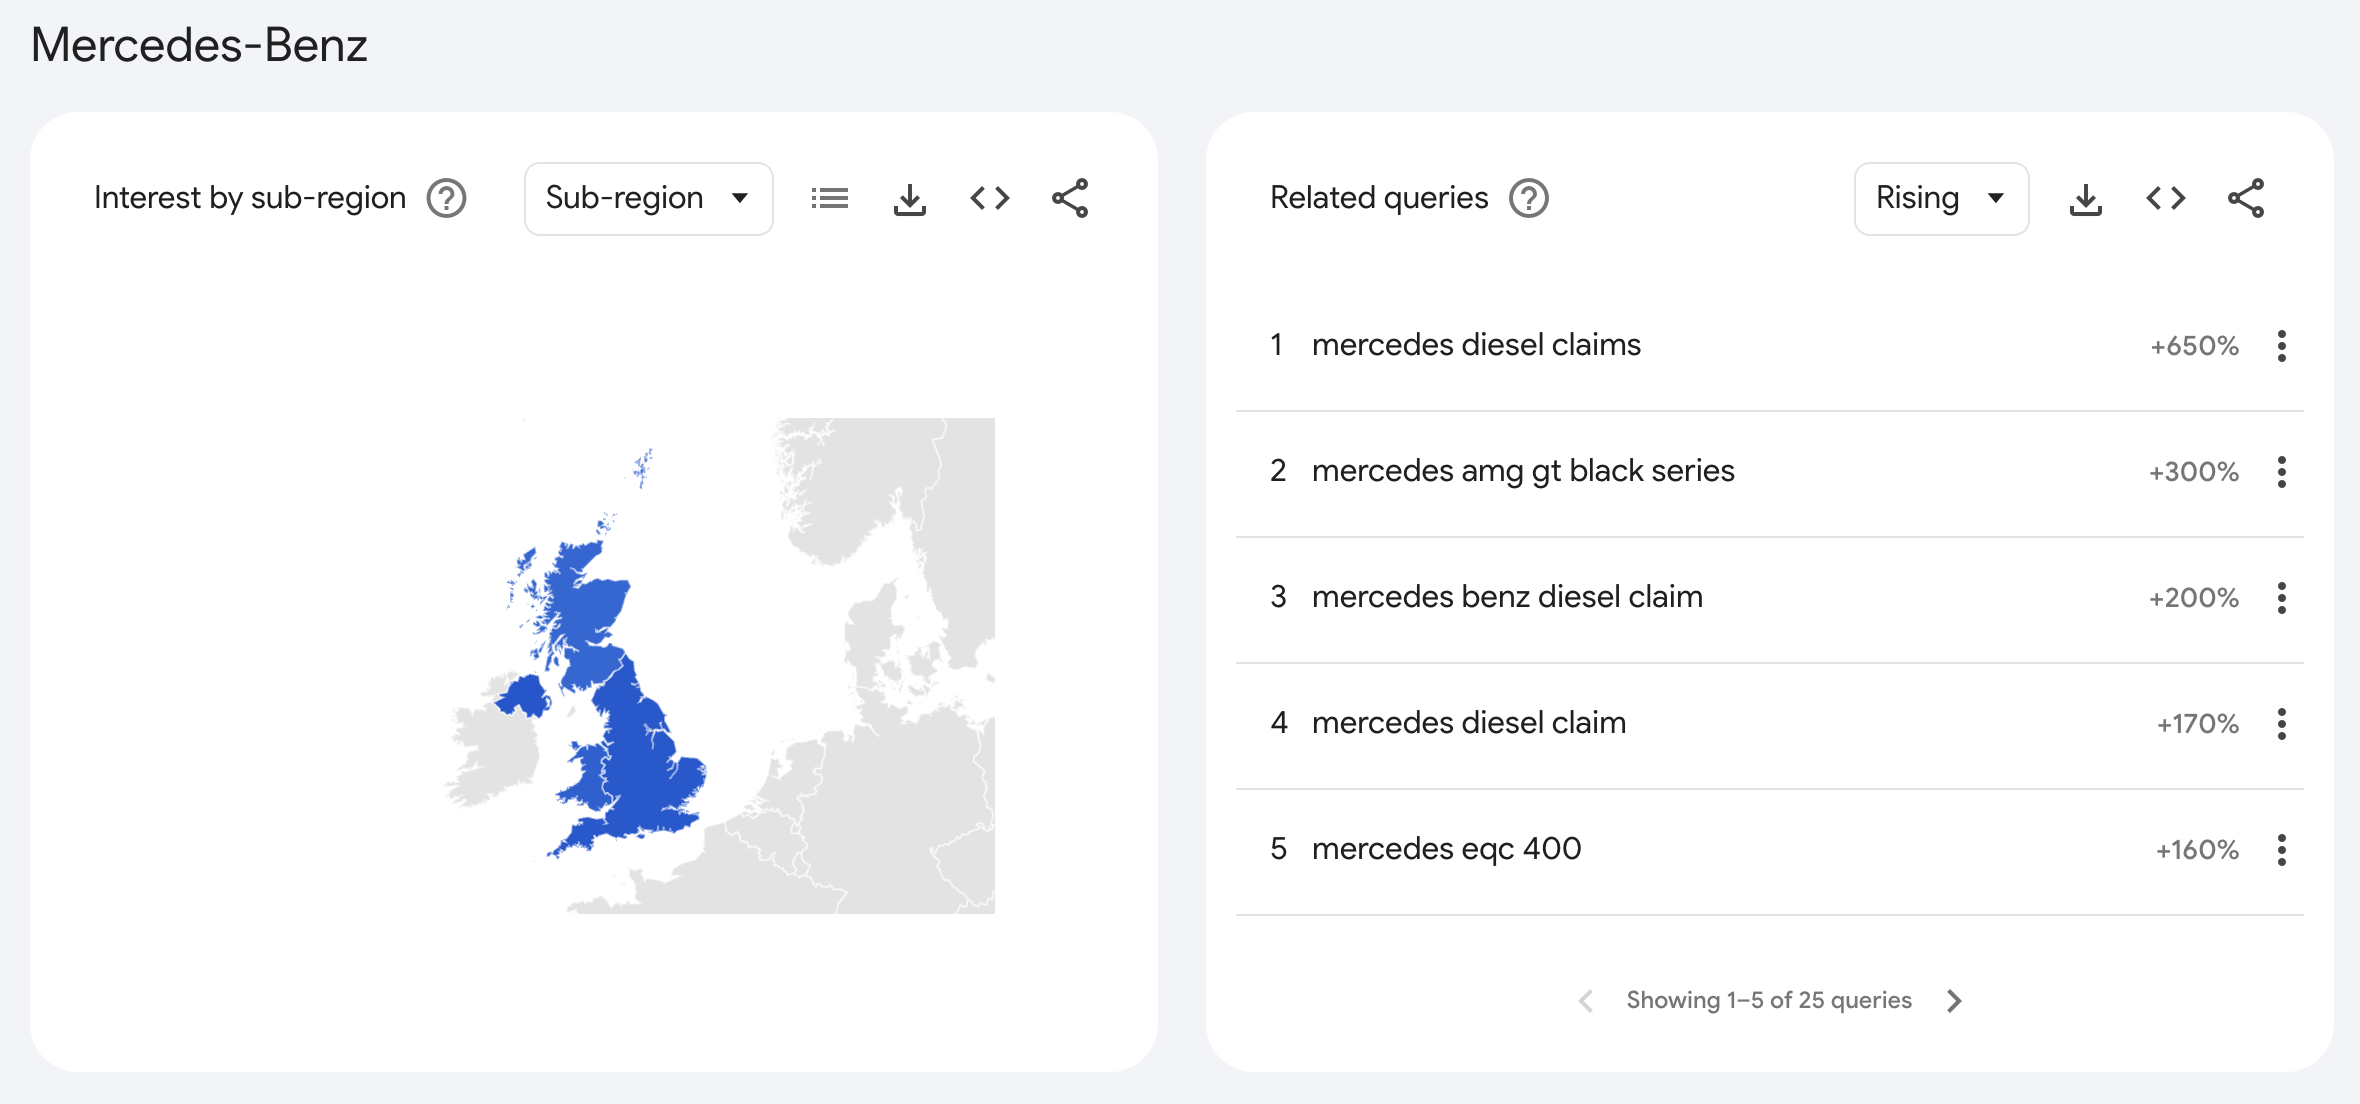

In [6]:
from IPython.display import Image
Image(filename = "/var/folders/9y/pjl381bj33qg4q5hcl7lwdzr0000gn/T/TemporaryItems/NSIRD_screencaptureui_OIk7pJ/Screenshot 2024-12-01 at 23.55.00.png", width=1000, height=1000)

#### Finding 2: Relatively, Mercedes Had The Most Searches From Business People, Teen Parents, and Financially Conscious Individuals
* This can be seen by the large search volume around these profile categories
* Top search volume around "mercedes a class" and "mercedes amg" terms indicates a high interest in these products

In [211]:
profile_values_normalized_fig.show()

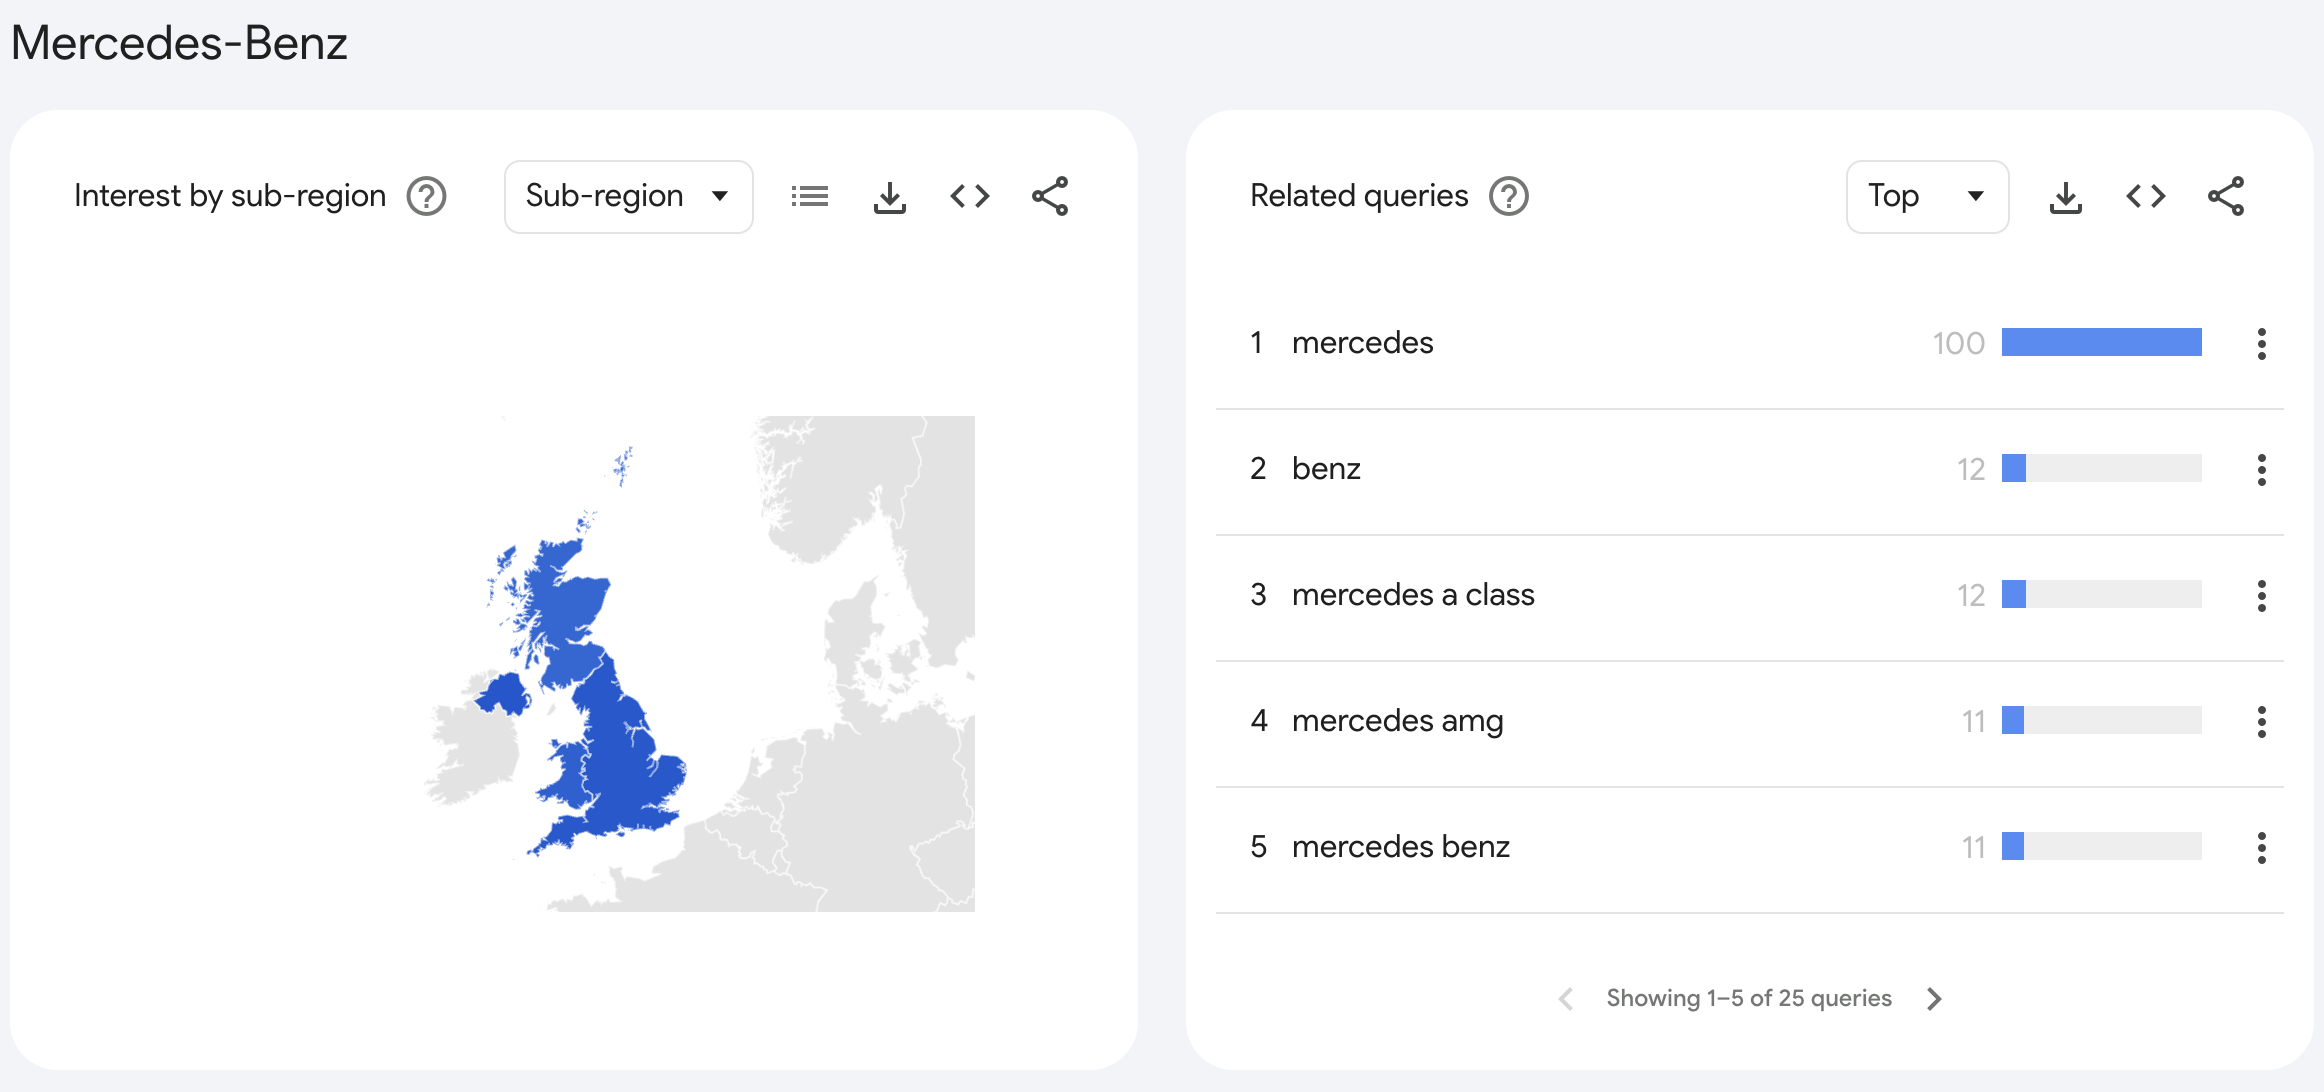

In [7]:
Image(filename = "/var/folders/9y/pjl381bj33qg4q5hcl7lwdzr0000gn/T/TemporaryItems/NSIRD_screencaptureui_BTEF7s/Screenshot 2024-12-02 at 00.03.46.png", width=1000, height=1000)

#### Finding 3: Comparatively, There Was A Large Search Volume Coming From London And Northern Ireland, Indicating Large Interest In Mercedes In These Areas

In [212]:
region_search_normalized_fig.show()

#### Recommendations:
1. Study BMW's platform and marketing strategies to better understand how Mercedes can improve overall marketing effectiveness
2. Run campaigns that aim to build brand trust, particularly surrounding the Diesel Emissions Claim (the campaign could be more effective with a certification from the UK transport regulators)
3. Reach Mercedes' key audiences by running campaigns that show how investing in Mercedes can lead to a great ROI
4. Show how the top interested products (such as the Mercedes A Class) aren't just great investments, but also low-emission ones
5. Effectively target London and Northern Ireland for better campaign results